# Assignment #5 - Deep Learning

### <font color="red"> DUE: Apr 19 (Thursday) 11:00 pm </font>  

<font color="blue"> Madiha Tabassum </font>

# I. Overview

The objective of this project is selecting and creating 3 different neural network structure using tensor flow and train your data with three different structure. I also stated the reason for selecting the three different structure. Finally, I visualized the training error, accuracy and the activities of first and last hidden layer for each network structure and compared them. I also tested the model with my test data and also compare the training time and test accuracy to find out the best model to fit my data.

# II. Data

# Introduction of Data

The data is from census database containing demographic and work information of adults. The dataset has 48842 samples and multivariate. The dataset has 14 feature/attribute values and attributes are integers and categorical. The features are used to predict whether a person makes over 50K a year. The features are[2]:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: Final sampling weight[3], continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,   10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


# Reading Data


In [1]:
#Reading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dfc = pd.read_csv("adult.data.csv")
dfc

age         workclass  fnlwgt     education  education-num  \
0       39         State-gov   77516     Bachelors             13   
1       50  Self-emp-not-inc   83311     Bachelors             13   
2       38           Private  215646       HS-grad              9   
3       53           Private  234721          11th              7   
4       28           Private  338409     Bachelors             13   
5       37           Private  284582       Masters             14   
6       49           Private  160187           9th              5   
7       52  Self-emp-not-inc  209642       HS-grad              9   
8       31           Private   45781       Masters             14   
9       42           Private  159449     Bachelors             13   
10      37           Private  280464  Some-college             10   
11      30         State-gov  141297     Bachelors             13   
12      23           Private  122272     Bachelors             13   
13      32           Private  205019    Assoc-acdm             12   
14      40           Private  121772     Assoc-voc             11   
15      34           Private  245487       7th-8th              4   
16      25  Self-emp-not-inc  176756       HS-grad              9   
17      32           Private  186824       HS-grad              9   
18      38           Private   28887          11th              7   
19      43  Self-emp-not-inc  292175       Masters             14   
20      40           Private  193524     Doctorate             16   
21      54           Private  302146       HS-grad              9   
22      35       Federal-gov   76845           9th              5   
23      43           Private  117037          11th              7   
24      59           Private  109015       HS-grad              9   
25      56         Local-gov  216851     Bachelors             13   
26      19           Private  168294       HS-grad              9   
27      54                 ?  180211  Some-college             10   
28      39           Private  367260       HS-grad              9   
29      49           Private  193366       HS-grad              9   
...    ...               ...     ...           ...            ...   
32531   30                 ?   33811     Bachelors             13   
32532   34           Private  204461     Doctorate             16   
32533   54           Private  337992     Bachelors             13   
32534   37           Private  179137  Some-college             10   
32535   22           Private  325033          12th              8   
32536   34           Private  160216     Bachelors             13   
32537   30           Private  345898       HS-grad              9   
32538   38           Private  139180     Bachelors             13   
32539   71                 ?  287372     Doctorate             16   
32540   45         State-gov  252208       HS-grad              9   
32541   41                 ?  202822       HS-grad              9   
32542   72                 ?  129912       HS-grad              9   
32543   45         Local-gov  119199    Assoc-acdm             12   
32544   31           Private  199655       Masters             14   
32545   39         Local-gov  111499    Assoc-acdm             12   
32546   37           Private  198216    Assoc-acdm             12   
32547   43           Private  260761       HS-grad              9   
32548   65  Self-emp-not-inc   99359   Prof-school             15   
32549   43         State-gov  255835  Some-college             10   
32550   43  Self-emp-not-inc   27242  Some-college             10   
32551   32           Private   34066          10th              6   
32552   43           Private   84661     Assoc-voc             11   
32553   32           Private  116138       Masters             14   
32554   53           Private  321865       Masters             14   
32555   22           Private  310152  Some-college             10   
32556   27           Private  257302    Assoc-acdm             12   
32557

In [2]:
del dfc['education']
dfc

age         workclass  fnlwgt  education-num         marital-status  \
0       39         State-gov   77516             13          Never-married   
1       50  Self-emp-not-inc   83311             13     Married-civ-spouse   
2       38           Private  215646              9               Divorced   
3       53           Private  234721              7     Married-civ-spouse   
4       28           Private  338409             13     Married-civ-spouse   
5       37           Private  284582             14     Married-civ-spouse   
6       49           Private  160187              5  Married-spouse-absent   
7       52  Self-emp-not-inc  209642              9     Married-civ-spouse   
8       31           Private   45781             14          Never-married   
9       42           Private  159449             13     Married-civ-spouse   
10      37           Private  280464             10     Married-civ-spouse   
11      30         State-gov  141297             13     Married-civ-spouse   
12      23           Private  122272             13          Never-married   
13      32           Private  205019             12          Never-married   
14      40           Private  121772             11     Married-civ-spouse   
15      34           Private  245487              4     Married-civ-spouse   
16      25  Self-emp-not-inc  176756              9          Never-married   
17      32           Private  186824              9          Never-married   
18      38           Private   28887              7     Married-civ-spouse   
19      43  Self-emp-not-inc  292175             14               Divorced   
20      40           Private  193524             16     Married-civ-spouse   
21      54           Private  302146              9              Separated   
22      35       Federal-gov   76845              5     Married-civ-spouse   
23      43           Private  117037              7     Married-civ-spouse   
24      59           Private  109015              9               Divorced   
25      56         Local-gov  216851             13     Married-civ-spouse   
26      19           Private  168294              9          Never-married   
27      54                 ?  180211             10     Married-civ-spouse   
28      39           Private  367260              9               Divorced   
29      49           Private  193366              9     Married-civ-spouse   
...    ...               ...     ...            ...                    ...   
32531   30                 ?   33811             13          Never-married   
32532   34           Private  204461             16     Married-civ-spouse   
32533   54           Private  337992             13     Married-civ-spouse   
32534   37           Private  179137             10               Divorced   
32535   22           Private  325033              8          Never-married   
32536   34           Private  160216             13          Never-married   
32537   30           Private  345898              9          Never-married   
32538   38           Private  139180             13               Divorced   
32539   71                 ?  287372             16     Married-civ-spouse   
32540   45         State-gov  252208              9              Separated   
32541   41                 ?  202822              9              Separated   
32542   72                 ?  129912              9     Married-civ-spouse   
32543   45         Local-gov  119199             12               Divorced   
32544   31           Private  199655             14               Divorced   
32545   39         Local-gov  111499             12     Married-civ-spouse   
32546   37           Private  198216             12               Divorced   
32547   43           Private  260761              9     Married-civ-spouse   
32548   65  Self-emp-not-inc   99359             15          Never-married   
32549   43         State-gov  255835             10               Divorced   
32550   43  Self-emp-not-inc 

In [3]:
#checking if there are any null values
dfc.isnull()

age  workclass  fnlwgt  education-num  marital-status  occupation  \
0      False      False   False          False           False       False   
1      False      False   False          False           False       False   
2      False      False   False          False           False       False   
3      False      False   False          False           False       False   
4      False      False   False          False           False       False   
5      False      False   False          False           False       False   
6      False      False   False          False           False       False   
7      False      False   False          False           False       False   
8      False      False   False          False           False       False   
9      False      False   False          False           False       False   
10     False      False   False          False           False       False   
11     False      False   False          False           False       False   
12     False      False   False          False           False       False   
13     False      False   False          False           False       False   
14     False      False   False          False           False       False   
15     False      False   False          False           False       False   
16     False      False   False          False           False       False   
17     False      False   False          False           False       False   
18     False      False   False          False           False       False   
19     False      False   False          False           False       False   
20     False      False   False          False           False       False   
21     False      False   False          False           False       False   
22     False      False   False          False           False       False   
23     False      False   False          False           False       False   
24     False      False   False          False           False       False   
25     False      False   False          False           False       False   
26     False      False   False          False           False       False   
27     False      False   False          False           False       False   
28     False      False   False          False           False       False   
29     False      False   False          False           False       False   
...      ...        ...     ...            ...             ...         ...   
32531  False      False   False          False           False       False   
32532  False      False   False          False           False       False   
32533  False      False   False          False           False       False   
32534  False      False   False          False           False       False   
32535  False      False   False          False           False       False   
32536  False      False   False          False           False       False   
32537  False      False   False          False           False       False   
32538  False      False   False          False           False       False   
32539  False      False   False          False           False       False   
32540  False      False   False          False           False       False   
32541  False      False   False          False           False       False   
32542  False      False   False          False           False       False   
32543  False      False   False          False           False       False   
32544  False      False   False          False           False       False   
32545  False      False   False          False           False       False   
32546  False      False   False          False           False       False   
32547  False      False   False          False           False       False   
32548  False      False   False          False           False       False   
32549  False      False   False          False           False       False   
32550  False      False   False

In [4]:
np.any(dfc.isnull())

False

In [6]:
workclassi={'?':1,'Private':1,'Self-emp-not-inc':2,'Self-emp-inc':3,'Federal-gov':4,'Local-gov':5,'State-gov':6,
            'Without-pay':7,'Never-worked':8}
educationi={'Bachelors':1,'Some-college':2,'11th':3,'HS-grad':4,'Prof-school':5,'Assoc-acdm':6,'Assoc-voc':7,
        '9th':8,'7th-8th':9,'12th':10,'Masters':11,'1st-4th':12,'10th':13,'Doctorate':14,'5th-6th':15,
        'Preschool':16}
maritali={'Married-civ-spouse':1,'Divorced':2,'Never-married':3,'Separated':4,'Widowed':5,'Married-spouse-absent':6,
        'Married-AF-spouse':7}
occupationi={'?':1,'Tech-support':1,'Craft-repair':2,'Other-service':3,'Sales':4,'Exec-managerial':5,'Prof-specialty':6,
        'Handlers-cleaners':7,'Machine-op-inspct':8,'Adm-clerical':9,'Farming-fishing':10,'Transport-moving':11,
        'Priv-house-serv':12,'Protective-serv':13,'Armed-Forces':14}
relationshipi={'Wife':1,'Own-child':2,'Husband':3,'Not-in-family':4,'Other-relative':5,'Unmarried':6}
racei={'White':1,'Asian-Pac-Islander':2,'Amer-Indian-Eskimo':3,'Other':4,'Black':5}
sexi={'Male':1,'Female':2}
countryi={'?':1,'United-States':1,'Cambodia':2,'England':3,'Puerto-Rico':4,'Canada':5,'Germany':6,'Outlying-US(Guam-USVI-etc)':7,
        'India':8,'Japan':9,'Greece':10,'China':11,'Cuba':12,'Iran':13,'Honduras':14,'Philippines':15,'Italy':16,
        'Poland':17,'Jamaica':18,'Vietnam':19,'Mexico':20,'Portugal':21,'Ireland':22,'France':23,'Dominican-Republic':24,
        'Laos':25,'Ecuador':26,'Taiwan':27,'Haiti':28,'Columbia':29,'Hungary':30,'Guatemala':31,'Nicaragua':32,
        'Scotland':33,'Thailand':34,'Yugoslavia':35,'El-Salvador':36,'Trinadad&Tobago':37,'Peru':38,'Hong':39,
        'Holand-Netherlands':40,'South':41}

salaryi={'<=50K':-1, '>50K':1}

X = dfc.iloc[:, :].copy()
X['workclass'] = X['workclass'].apply(lambda x: workclassi[x])
#XC['education'] = XC['education'].apply(lambda x: educationi[x])
X['marital-status'] = X['marital-status'].apply(lambda x: maritali[x])
X['occupation'] = X['occupation'].apply(lambda x: occupationi[x])
X['relationship'] = X['relationship'].apply(lambda x: relationshipi[x])
X['race'] = X['race'].apply(lambda x: racei[x])
X['sex'] = X['sex'].apply(lambda x: sexi[x])
X['native-country'] = X['native-country'].apply(lambda x: countryi[x])
X['Salary'] = X['Salary'].apply(lambda x: salaryi[x])
X

age  workclass  fnlwgt  education-num  marital-status  occupation  \
0       39          6   77516             13               3           9   
1       50          2   83311             13               1           5   
2       38          1  215646              9               2           7   
3       53          1  234721              7               1           7   
4       28          1  338409             13               1           6   
5       37          1  284582             14               1           5   
6       49          1  160187              5               6           3   
7       52          2  209642              9               1           5   
8       31          1   45781             14               3           6   
9       42          1  159449             13               1           5   
10      37          1  280464             10               1           5   
11      30          6  141297             13               1           6   
12      23          1  122272             13               3           9   
13      32          1  205019             12               3           4   
14      40          1  121772             11               1           2   
15      34          1  245487              4               1          11   
16      25          2  176756              9               3          10   
17      32          1  186824              9               3           8   
18      38          1   28887              7               1           4   
19      43          2  292175             14               2           5   
20      40          1  193524             16               1           6   
21      54          1  302146              9               4           3   
22      35          4   76845              5               1          10   
23      43          1  117037              7               1          11   
24      59          1  109015              9               2           1   
25      56          5  216851             13               1           1   
26      19          1  168294              9               3           2   
27      54          1  180211             10               1           1   
28      39          1  367260              9               2           5   
29      49          1  193366              9               1           2   
...    ...        ...     ...            ...             ...         ...   
32531   30          1   33811             13               3           1   
32532   34          1  204461             16               1           6   
32533   54          1  337992             13               1           5   
32534   37          1  179137             10               2           9   
32535   22          1  325033              8               3          13   
32536   34          1  160216             13               3           5   
32537   30          1  345898              9               3           2   
32538   38          1  139180             13               2           6   
32539   71          1  287372             16               1           1   
32540   45          6  252208              9               4           9   
32541   41          1  202822              9               4           1   
32542   72          1  129912              9               1           1   
32543   45          5  119199             12               2           6   
32544   31          1  199655             14               2           3   
32545   39          5  111499             12               1           9   
32546   37          1  198216             12               2           1   
32547   43          1  260761              9               1           8   
32548   65          2   99359             15               3           6   
32549   43          6  255835             10               2           9   
32550   43          2   27242             10               1           2   
32551   32          1   34066              6           

# Visualization of the Data


I have created normal graph plots, histogram and scatter plot to visualize the data. 

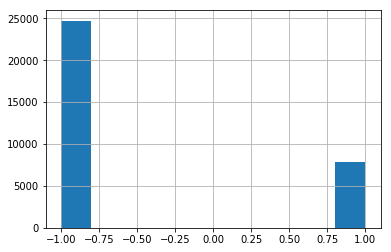

In [7]:
T=X['Salary']
XC=X.iloc[:,:-1]
T.hist()

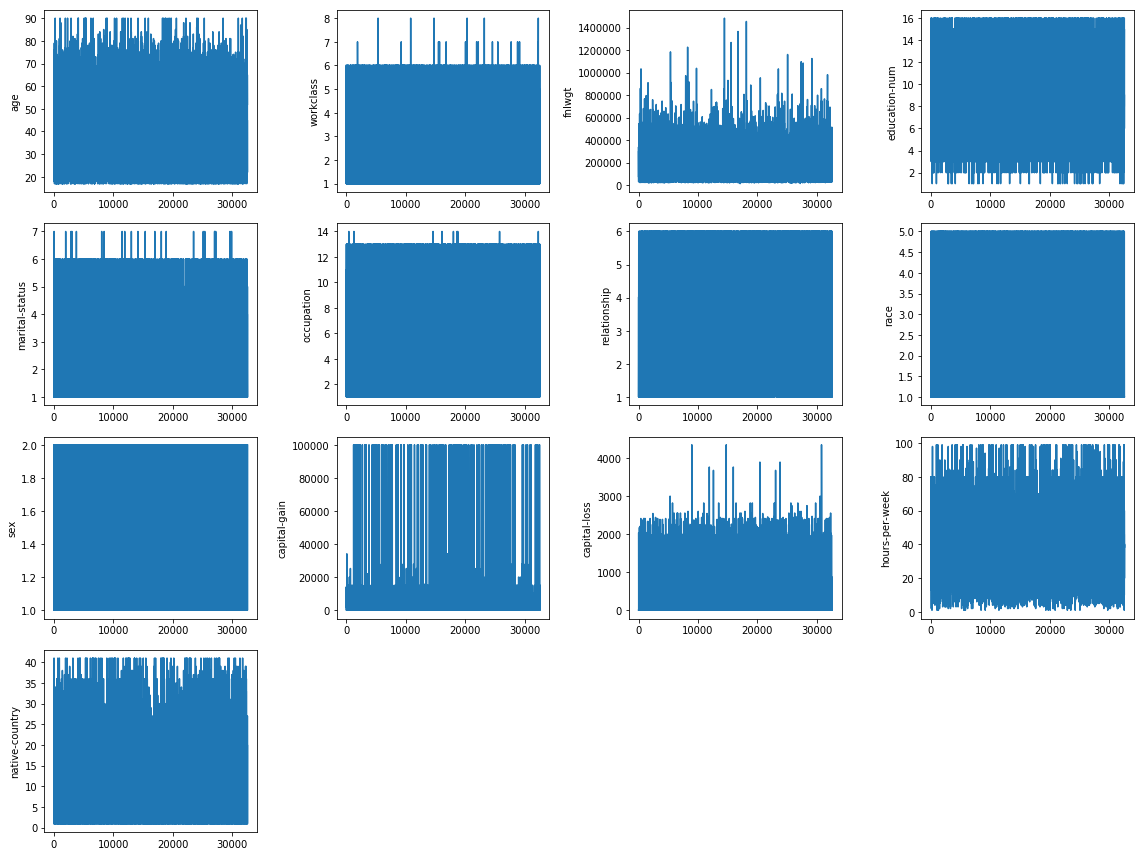

In [8]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(13):
    plt.subplot(4, 4, i+1)
    plt.plot(XC.iloc[:, i])
    plt.ylabel(XC.columns.values[i])
fig.tight_layout()

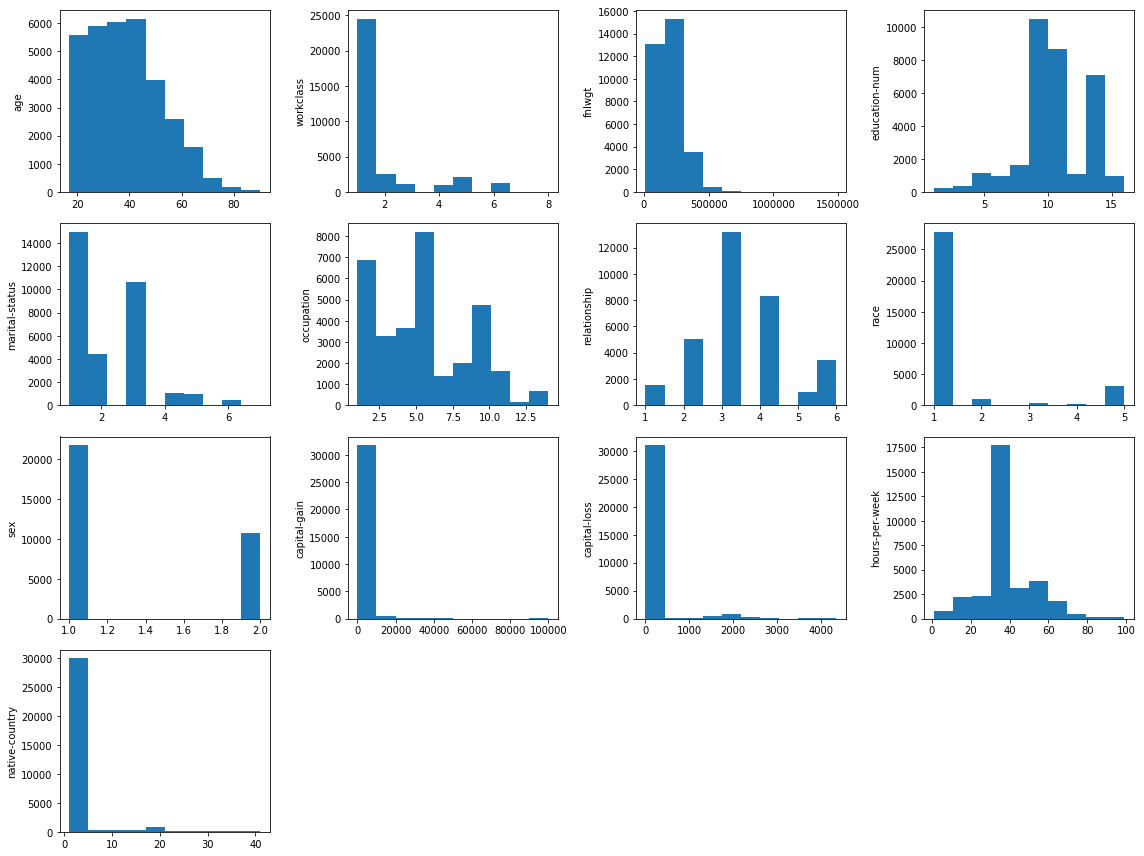

In [9]:
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(13):
    plt.subplot(4, 4, i+1)
    plt.hist(XC.iloc[:, i])
    plt.ylabel(XC.columns.values[i])
fig.tight_layout()

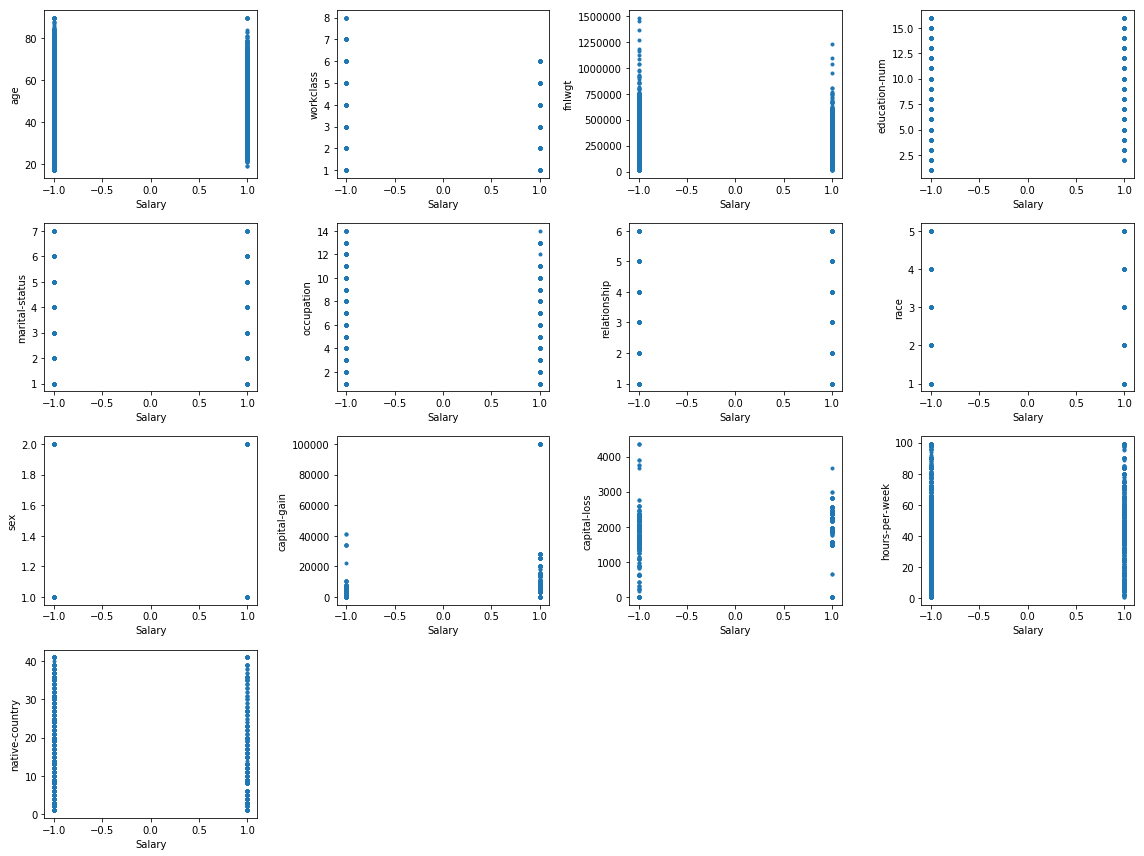

In [10]:
def box_scatterC(T,str):
    fig = plt.figure(figsize=(16,12))
    plt.clf()
    for i in range(13):
        plt.subplot(4, 4, i+1)
        plt.plot(T, XC.iloc[:, i], '.')
        plt.ylabel(XC.columns.values[i])
        plt.xlabel(str)
    fig.tight_layout()

box_scatterC(T,'Salary')

# Preliminery Observations
From the graph, we can see that less than one-third of the sample earn more than 50K in a year. Nobody who works without pay earns more than 50K/year. All the adults whom only completed preschool earn less than 50K/year. Adults who have capital gain more than aproximately 42000 get more than 50K/year. Alternatively, adults who have capital loss more than approximately 3800 earn less than 50K/year.

# Deep Neural Network Class

In [13]:
#partition of data

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.6, 0.4]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  # first index to zero
    for k, r in enumerate(ratio):
        nrows = int(round(N * r))  # number of rows
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [14]:
Xlst, Tlst = partition(pd.DataFrame(XC), pd.DataFrame(T))

In [39]:
# preparation

import tensorflow as tf
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs


# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import IPython.display as ipd  # for display and clear_output

# First Nural network:

# Reason of choice-Summary:

As my first choice of network structure I choose a simple feed forward neural network with 6 hidden layer and 1 hidden unit per layer. The learning rate is 0.01 and I have train the network for 100 epochs. The data with which I am working on is non-linearly separable data. The data set has 13 features and output size is 2(whether salary <=50k or >50k ) The requirement was to use at least 6 hidden layer. I want to check what is the performance of the network if number of hidden unit per layer set to absolutely minimum that is 0. If it gives the same performace as large number of perceptron per hidden layer that it would be cost effective to use this structure. That is the main reason behind selectinf this network architecture.

# Explanation of code:
I have created a Deepnet class to create the neural network structure and training and testing the data. The __init__ function initializes the variables such as the number of epochs, number of hidden layers, learning rate, batch size and number of change neurons. I changed the number of neuron in each layer by this constant. The selu function run activation function on the hidden layer output. The reset_graph function reset the graph. In the deepN function, I used tf.layers.dense to create hidden and output layers. I used tensor flow one hot function to convert my target values in one hot representation. I have calculated the output layer and pass it to tf.nn.softmax_cross_entropy_with_logits that calculate run the softmax function on the output. After that, I calculated the reduce mean function to calculate the loss or cost. I run Adam optimizer to train our model. I divided the entire input data to multiple batches of size 100 to train our model. I have calculated the cost and accuracy of each batch and finally calculated the mean cost and accuracy for each epoch.

For this data structure, we called the DeepNet with batch size=100, learning rate=.01, number of epochs=100, number of hidden layer=6, number of perceptron in each hidden layer 1.

In [30]:
Xlst[0].__len__()

19537

c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


1
1
1
1
1
1
training time 21.430028945363233
test accuracy 23.87106716632843 %


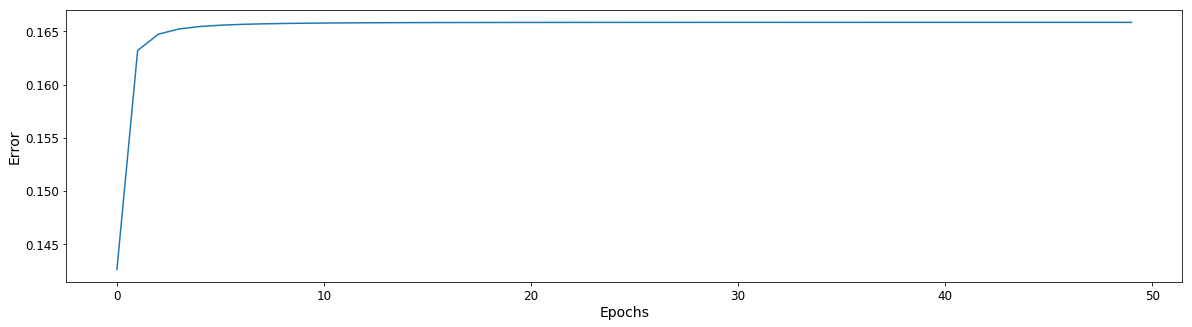

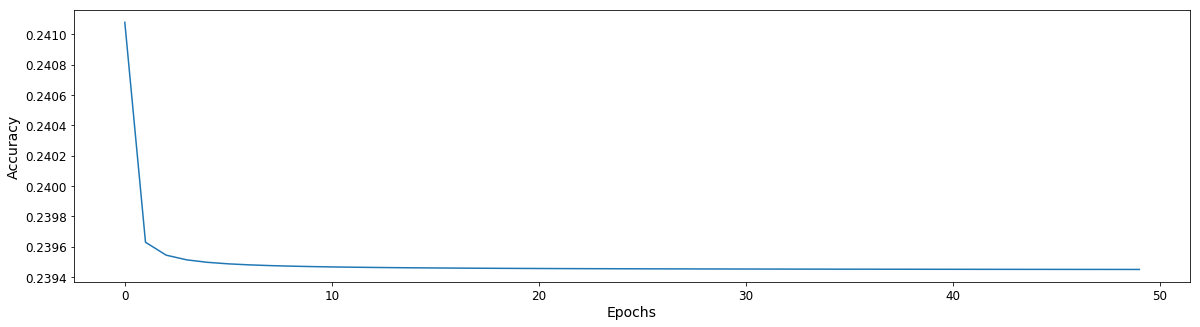

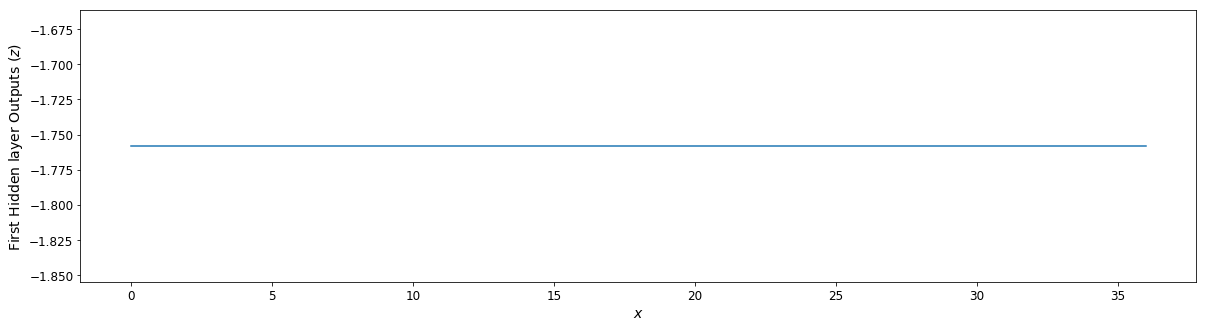

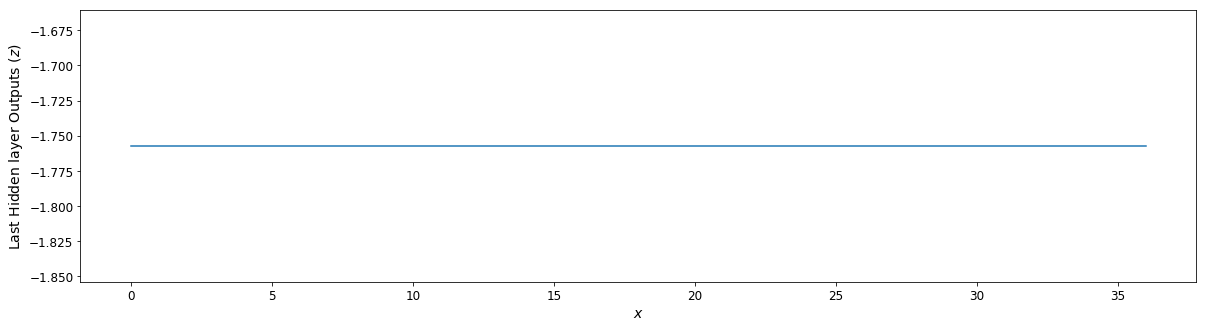

In [22]:
#reset_graph()
DL=deepNet(100, 0.01, 100, 6, 1, 0)
DL.deepN(Xlst[0].as_matrix(),Tlst[0].as_matrix(),Xlst[1].as_matrix(),Tlst[1].as_matrix())

# Second Nural network:

# Reason of choice-Summary:

As my second choice of network structure, I choose a bit more complex feed-forward neural network with ten hidden layers and 15 hidden unit per layer. The learning rate is 0.01, and I have train the network for 100 epochs. The data with which I am working on is non-linearly separable data. The dataset has 13 features, and output size is 2(whether salary <=50k or >50k ). I wanted to check whether increasing the number of hidden layer and number of perceptron per layer improve the performance of the training time or test accuracy. I also want to check the how complex network architecture we need to get a good accuracy for the salary data I used.

# Explanation of code:
I have created a Deepnet class to create the neural network structure and training and testing the data. The __init__ function initializes the variables such as the number of epochs, number of hidden layers, learning rate, batch size and number of change neurons. I changed the number of neuron in each layer by this constant. The selu function run activation function on the hidden layer output. The reset_graph function reset the graph. In the deepN function, I used tf.layers.dense to create hidden and output layers. I used tensor flow one hot function to convert my target values in one hot representation. I have calculated the output layer and pass it to tf.nn.softmax_cross_entropy_with_logits that calculate run the softmax function on the output. After that, I calculated the reduce mean function to calculate the loss or cost. I run Adam optimizer to train our model. I divided the entire input data to multiple batches of size 100 to train our model. I have calculated the cost and accuracy of each batch and finally calculated the mean cost and accuracy for each epoch.

For this data structure, we called the DeepNet with batch size=100, learning rate=.01, number of epochs=100, number of hidden layer=10, number of perceptron in each hidden layer 15.


c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


15
15
15
15
15
15
15
15
15
15
training time 39.01604530670534
test accuracy 0.0001016919554786 %


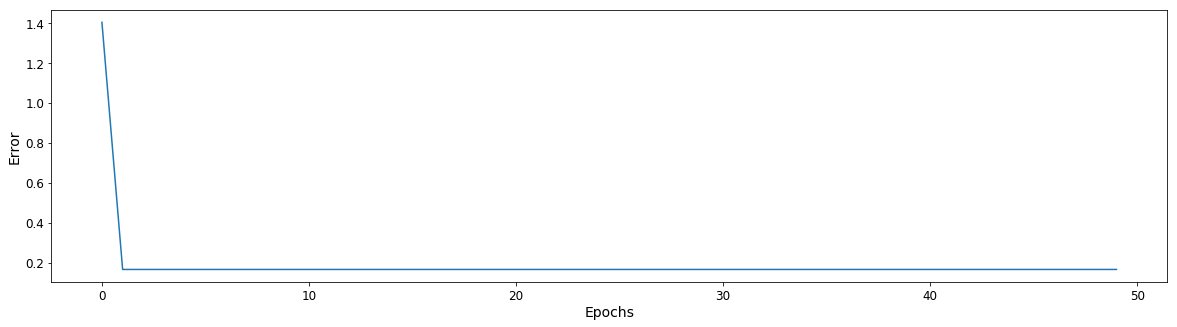

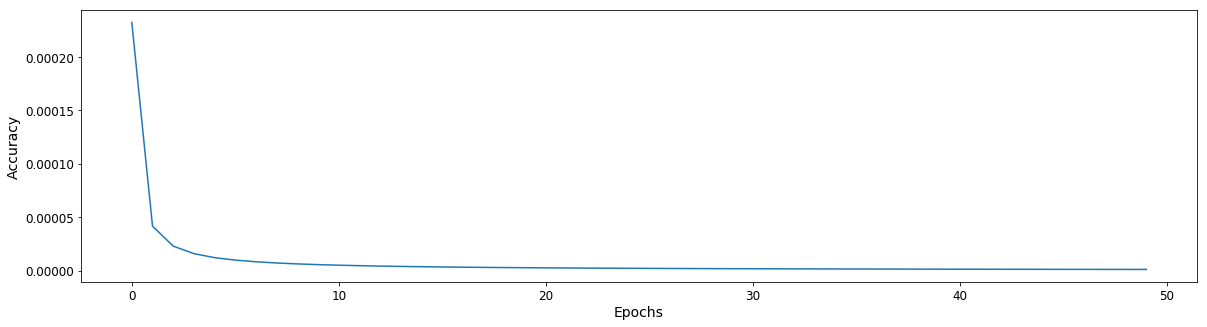

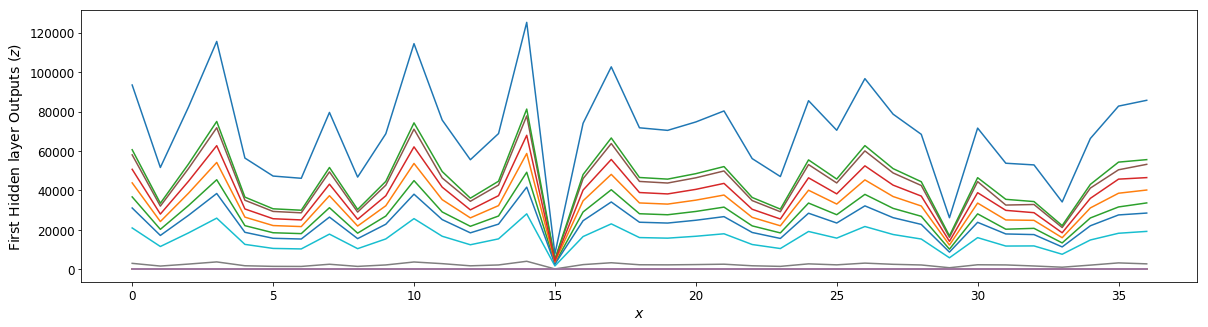

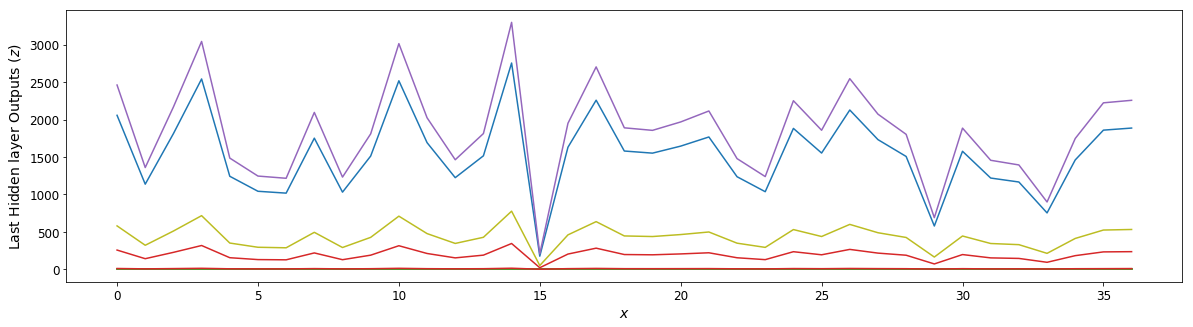

In [26]:
#DL.reset_graph()
DL=deepNet(100, 0.01, 100, 10, 15, 0)
DL.deepN(Xlst[0].as_matrix(),Tlst[0].as_matrix(),Xlst[1].as_matrix(),Tlst[1].as_matrix())

# Third Nural network:

# Reason of choice-Summary:
As my third choice of network structure, I choose a deconvolutional neural network with 6 hidden layers. I increase the number of hidden unit per hidden layer by two. The learning rate is 0.01, and I have train the network for 100 epochs. The data with which I am working on is non-linearly separable data. The dataset has 13 features, and output size is 2(whether salary <=50k or >50k ). The deconvolutional neural network work well with images as the hidden layers can extract important features from the image and use that to generate more accurate prediction. Though my data is a somple classification data, I wanted to still check whether use of such deconvolutional network stucture also improves the accuracy of our model.

# Explanation of code:
I have created a Deepnet class to create the neural network structure and training and testing the data. The __init__ function initializes the variables such as the number of epochs, number of hidden layers, learning rate, batch size and number of change neurons. I changed the number of neuron in each layer by this constant. The selu function run activation function on the hidden layer output. The reset_graph function reset the graph. In the deepN function, I used tf.layers.dense to create hidden and output layers. I used tensor flow one hot function to convert my target values in one hot representation. I have calculated the output layer and pass it to tf.nn.softmax_cross_entropy_with_logits that calculate run the softmax function on the output. After that, I calculated the reduce mean function to calculate the loss or cost. I run Adam optimizer to train our model. I divided the entire input data to multiple batches of size 100 to train our model. I have calculated the cost and accuracy of each batch and finally calculated the mean cost and accuracy for each epoch.

For this data structure, we called the DeepNet with batch size=100, learning rate=.01, number of epochs=100, number of hidden layer=10, number of perceptron in each hidden layer 25 that we and change perceptron=2. So, the first hidden layer has 3 perceptron and number of perceptrons increased by 2 in each layer.


c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


3
5
7
9
11
13
15
17
19
21
training time 37.934600319131505
test accuracy 12.740729749202728 %


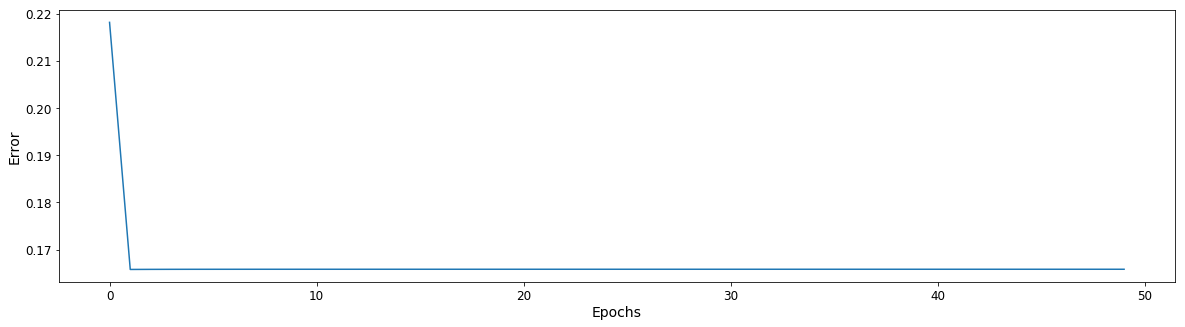

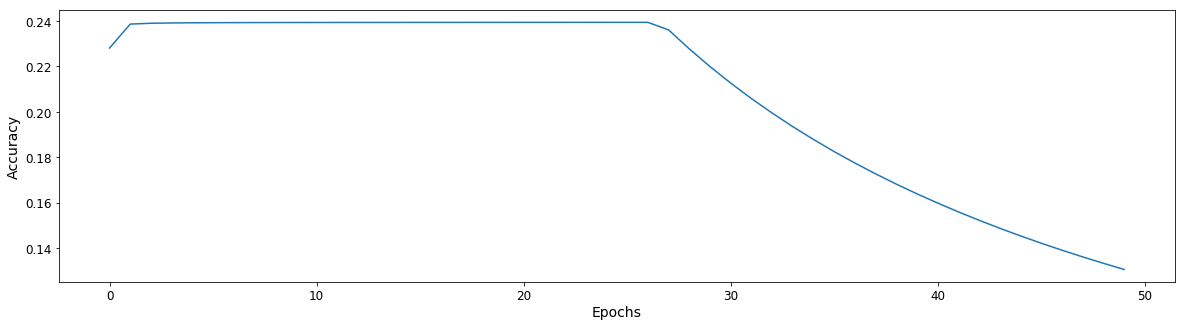

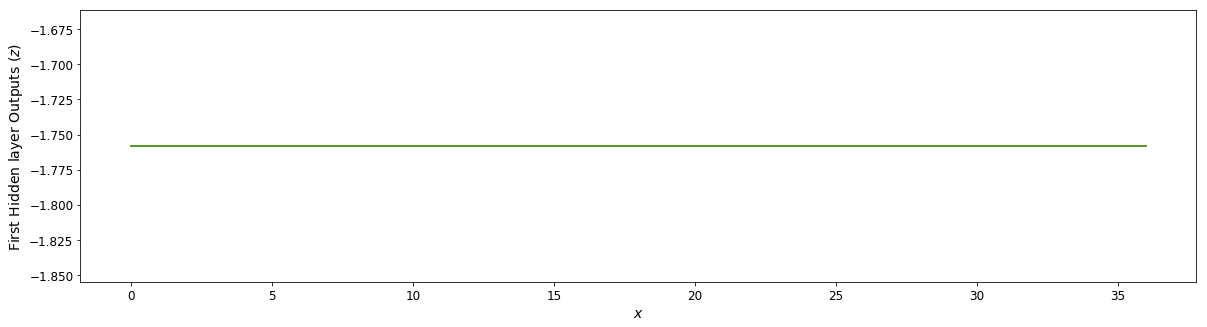

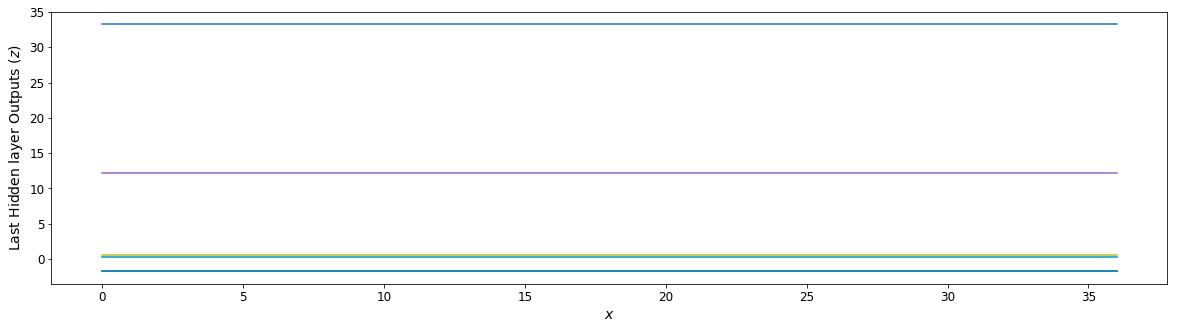

In [18]:
#reset_graph()
DL=deepNet(100, 0.01, 100, 10, 25, 2)
DL.deepN(Xlst[0].as_matrix(),Tlst[0].as_matrix(),Xlst[1].as_matrix(),Tlst[1].as_matrix())

# Explanation of experimental codes

I have generated 800 random observation as shown in follows. I have two input features and two output classes. As you can see in the picture the problem set is not linearly seperable . First I partition my data into test and train. 60% of the data are train data and rest are test data. I have created a simple neural net structure with 6 hidden layer and 3 units per layer by using the deepNet class. I train the model using deep Function. I got a testing accuracy of 99.45% with the experimental code.


Text(0.5, 1.0, 'Circles')

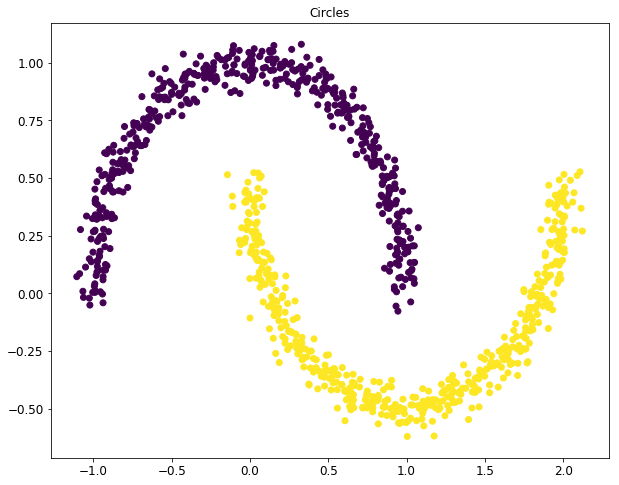

In [36]:
# Data for testing
#from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

#Xp, Tp = make_circles(n_samples=800, noise=0.07, factor=0.4)
Xp, Tp = make_moons(n_samples=1000, noise=.05)

plt.figure(figsize=(10, 8))
plt.scatter(Xp[:, 0], Xp[:, 1], marker='o', c=Tp)
plt.title("Circles")




In [37]:
Xpre, Tpre = partition(pd.DataFrame(Xp), pd.DataFrame(Tp))

c:\users\rrahman3\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


5
5
5
5
5
5
5
5
5
5
training time 45.420259035705385
test accuracy 98.98013472557068 %


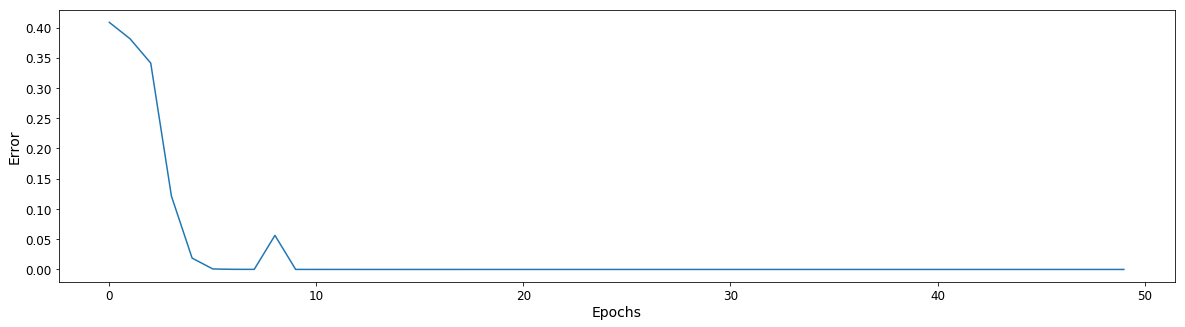

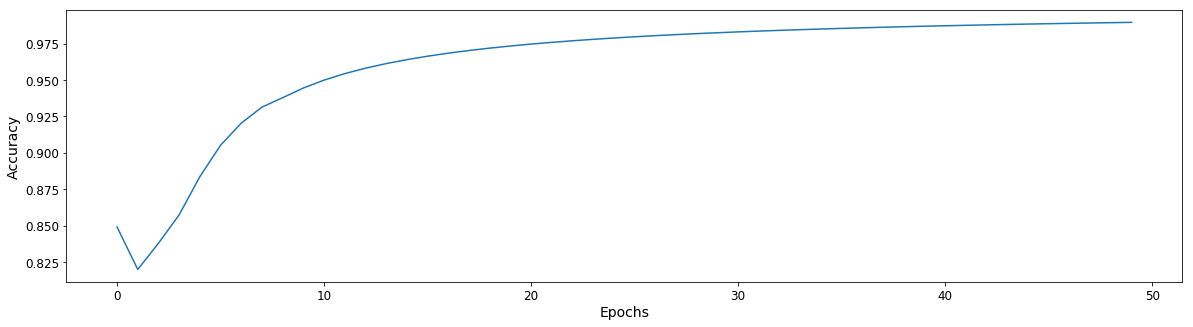

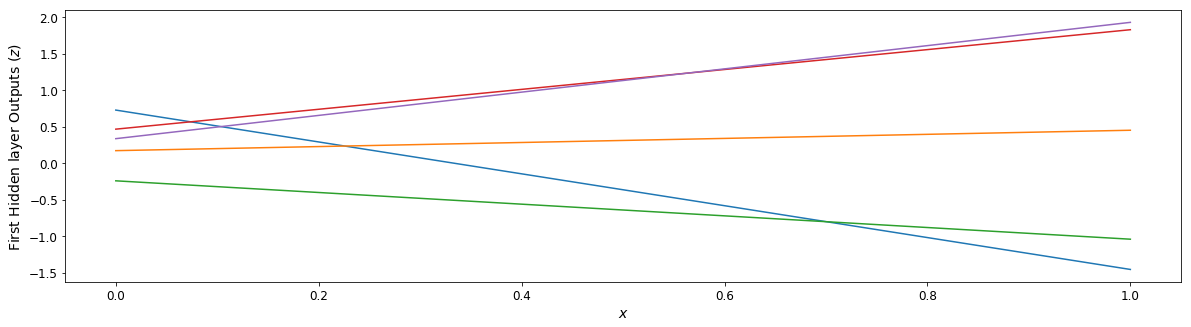

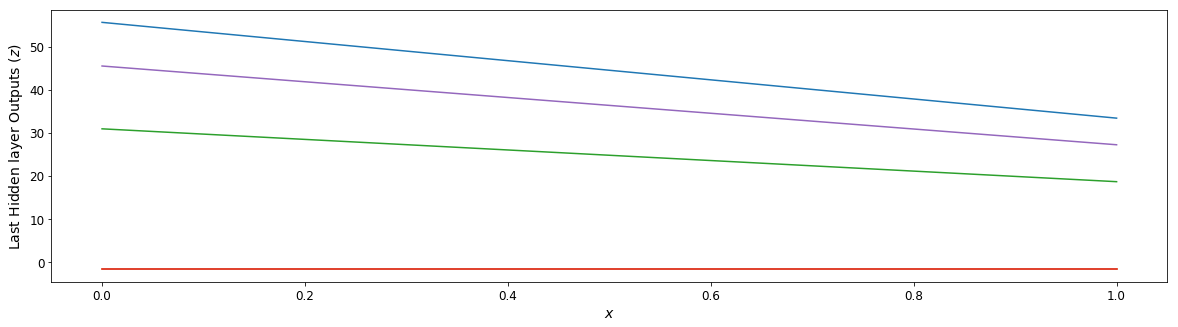

In [38]:
DL=deepNet(2, 0.01, 100, 10, 5, 0)
DL.deepN(Xpre[0].as_matrix(),Tpre[0].as_matrix(),Xpre[1].as_matrix(),Tpre[1].as_matrix())

# IV - Results

# Discussions about the choice of network structures/Results

- I could not find much differece between the 3 architecture in terms of testing accuracy. Though the first architecture has only 6 hidden layers and only one perceptron per layer still it perform similar to second architecture that has 10 hidden layer with 20 perceptron per layer and third architecture that have 6 layer with 6-16 perceptron per layer. However, the first architecture took lowest time for training 27.04s, followed by the second model which took 33.59s. The second model took most time 46.49s. So, if we think about the test accuracy, training time and cost of perceptron I think the network structure is the best structure for my input data.

- In case of error, the first and third model performed best. both models goes down to error label 0 only after 1 epoch. However, the first architecture never reach the error label of 0.

- In first hidden layer, the activities in first and last hidden layer is kind of same. In the second and third architecutre, there is more activity in first layer than the last layer. It represents that in the last layer the model already learned something hence has low activities.





# Conclusions

I learn how to implement neural network with tensot flow and the basics of tensor flow. I also realized it is really hard to find a good model for your data. I have one suggestion. the rubrics in this assignment are not clear enough. I find it vague and redundant.

# Extra Credit

- Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources. 

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 
